In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.duplicated().sum()

17

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
data.drop(['Country','Postal Code'] , axis =1 , inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


In [12]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [13]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [14]:
data['City'].value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [15]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [16]:
data['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [17]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [18]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [19]:
data.groupby('Ship Mode')['Profit'].mean()

Ship Mode
First Class       31.850134
Same Day          29.283924
Second Class      29.565956
Standard Class    27.534715
Name: Profit, dtype: float64

In [20]:
data.groupby('State')[['Sales','Profit']].sum()[:10]

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457576.2715,76330.7891
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


In [21]:
data.groupby('Ship Mode')[['Sales','Profit']].mean()

,Sales,Profit
Ship Mode,,
First Class,228.614490,31.850134
Same Day,236.755950,29.283924
Second Class,236.323750,29.565956
Standard Class,227.928858,27.534715


In [22]:
data.groupby('Segment')[['Sales','Profit']].mean()

,Sales,Profit
Segment,,
Consumer,223.969279,25.855188
Corporate,234.185781,30.499164
Home Office,241.311234,33.883643


In [23]:
data.groupby('State')[['Sales','Profit']].mean()[:10]

,Sales,Profit
State,,
Alabama,319.846557,94.865989
Arizona,157.508933,-15.303235
Arkansas,194.635500,66.811452
California,229.246629,38.241878
Colorado,176.418231,-35.867351
Connecticut,163.223866,42.823071
Delaware,285.948635,103.930988
District of Columbia,286.502000,105.958930
Florida,233.612815,-8.875461


In [24]:
data.groupby('Region')[['Sales','Profit']].mean()

,Sales,Profit
Region,,
Central,215.947759,17.100421
East,238.465798,32.163905
South,241.803645,28.857673
West,227.139254,33.927281


In [25]:
data.groupby('Category')[['Sales','Profit','Quantity']].agg(['sum','mean'])

Sales                   Profit            Quantity  \
                         sum        mean          sum       mean      sum   
Category                                                                    
Furniture        741306.3133  350.002981   18421.8137   8.697740     8020   
Office Supplies  718735.2440  119.550107  122364.6608  20.353403    22861   
Technology       836154.0330  452.709276  145454.9481  78.752002     6939   

                           
                     mean  
Category                   
Furniture        3.786591  
Office Supplies  3.802562  
Technology       3.756903

In [26]:
data.groupby('Sub-Category')['Sales','Profit','Quantity'].agg(['sum','mean'])

Sales                   Profit             Quantity  \
                      sum         mean         sum        mean      sum   
Sub-Category                                                              
Accessories   167380.3180   215.974604  41936.6357   54.111788     2976   
Appliances    107532.1610   230.755710  18138.0054   38.922758     1729   
Art            27107.0320    34.096896   6524.6118    8.207059     2996   
Binders       203409.1690   133.645972  30228.0003   19.860710     5971   
Bookcases     114879.9963   503.859633  -3472.5560  -15.230509      868   
Chairs        327777.7610   532.971969  26567.1278   43.198582     2351   
Copiers       149528.0300  2198.941618  55617.8249  817.909190      234   
Envelopes      16476.4020    64.867724   6964.1767   27.418019      906   
Fasteners       3024.2800    13.936774    949.5182    4.375660      914   
Furnishings    91683.0240    95.902745  13052.7230   13.653476     3560   
Labels         12444.9120    34.283504   5526.3820   15.224193     1396   
Machines      189238.6310  1645.553313   3384.7569   29.432669      440   
Paper          78224.1420    57.560075  33944.2395   24.977365     5144   
Phones        330007.0540   371.211534  44515.7306   50.073938     3289   
Storage       223843.6080   264.590553  21278.8264   25.152277     3158   
Supplies       46673.5380   245.650200  -1189.0995   -6.258418      647   
Tables        206965.5320   648.794771 -17725.4811  -55.565771     1241   

                        
                  mean  
Sub-Category            
Accessories   3.840000  
Appliances    3.710300  
Art           3.768553  
Binders       3.923127  
Bookcases     3.807018  
Chairs        3.822764  
Copiers       3.441176  
Envelopes     3.566929  
Fasteners     4.211982  
Furnishings   3.723849  
Labels        3.845730  
Machines      3.826087  
Paper         3.785136  
Phones        3.699663  
Storage       3.732861  
Supplies      3.405263  
Tables        3.890282

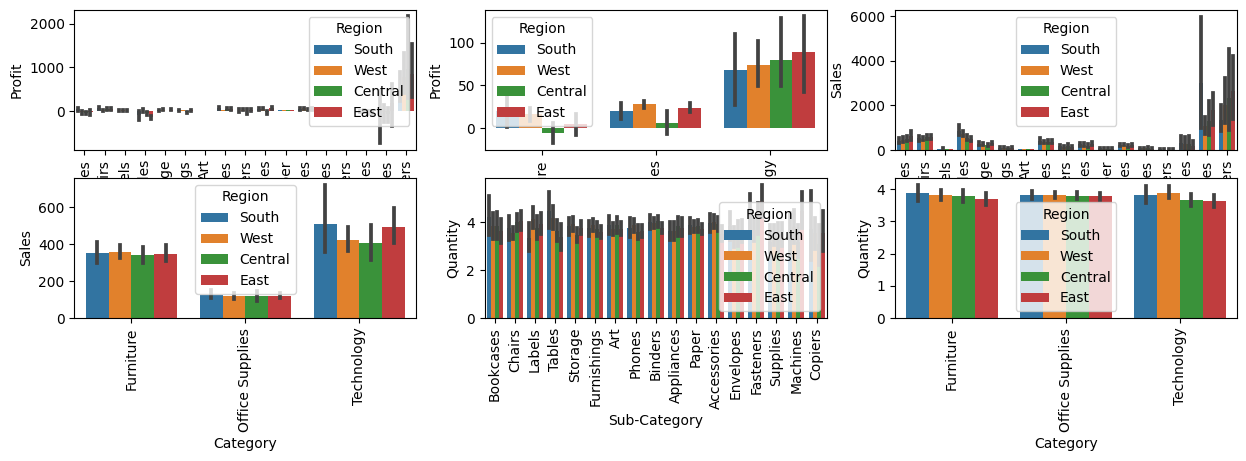

In [27]:
plt.subplots(figsize=(15,4))

plt.subplot(2,3,1)
sns.barplot(x=data['Sub-Category'] , y=data.Profit , hue=data['Region'])
plt.xticks(rotation=90)

plt.subplot(2,3,2)
sns.barplot(x=data['Category'] , y=data.Profit , hue=data['Region'])
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.barplot(x=data['Sub-Category'] , y=data.Sales , hue=data['Region'])
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.barplot(x=data['Category'] , y=data.Sales , hue=data['Region'])
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.barplot(x=data['Sub-Category'] , y=data.Quantity , hue=data['Region'])
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.barplot(x=data['Category'] , y=data.Quantity , hue=data['Region'])
plt.xticks(rotation=90)

plt.show()

In [28]:
data.groupby(['Ship Mode','Segment','State','City','Region','Sub-Category','Category'])['Sales','Profit','Quantity'].agg(['sum','mean']).reset_index()

Ship Mode      Segment      State        City   Region  \
                                                                    
0        First Class     Consumer    Alabama      Mobile    South   
1        First Class     Consumer    Arizona        Mesa     West   
2        First Class     Consumer    Arizona        Mesa     West   
3        First Class     Consumer    Arizona     Phoenix     West   
4        First Class     Consumer    Arizona  Scottsdale     West   
...              ...          ...        ...         ...      ...   
5791  Standard Class  Home Office  Wisconsin    Superior  Central   
5792  Standard Class  Home Office  Wisconsin    Superior  Central   
5793  Standard Class  Home Office  Wisconsin    Superior  Central   
5794  Standard Class  Home Office  Wisconsin    Superior  Central   
5795  Standard Class  Home Office    Wyoming    Cheyenne     West   

     Sub-Category         Category     Sales               Profit            \
                                         sum       mean       sum      mean   
0     Furnishings        Furniture     8.960     8.9600    2.7776    2.7776   
1          Phones       Technology   552.000   552.0000   34.5000   34.5000   
2          Tables        Furniture   393.165   393.1650 -204.4458 -204.4458   
3         Binders  Office Supplies    56.817    28.4085  -41.5308  -20.7654   
4         Binders  Office Supplies    36.741    18.3705  -27.2368  -13.6184   
...           ...              ...       ...        ...       ...       ...   
5791  Furnishings        Furniture    47.400    47.4000   21.3300   21.3300   
5792        Paper  Office Supplies   674.460   337.2300  323.7408  161.8704   
5793       Phones       Technology   125.990   125.9900   35.2772   35.2772   
5794      Storage  Office Supplies    49.760    49.7600   13.9328   13.9328   
5795       Chairs        Furniture  1603.136  1603.1360  100.1960  100.1960   

     Quantity        
          sum  mean  
0           2   2.0  
1          10  10.0  
2           3   3.0  
3           7   3.5  
4          13   6.5  
...       ...   ...  
5791        5   5.0  
5792       13   6.5  
5793        1   1.0  
5794        4   4.0  
5795        4   4.0  

[5796 rows x 13 columns]

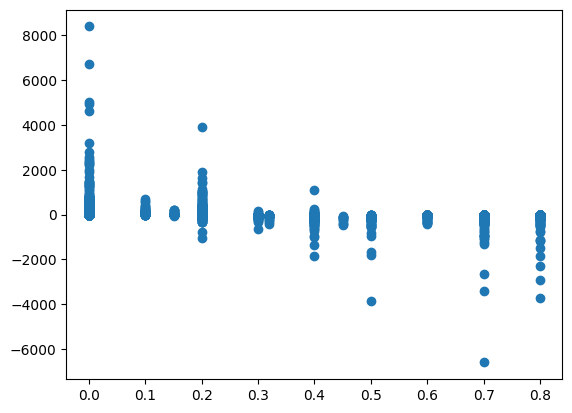

In [29]:
plt.scatter(x=data['Discount'] , y=data['Profit'])


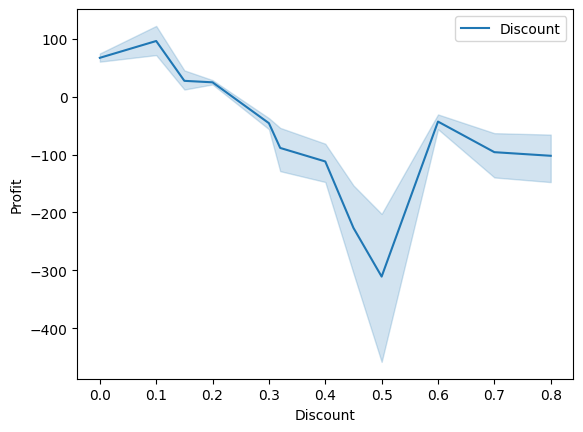

In [30]:
sns.lineplot(x="Discount" , y='Profit' , data=data , label='Discount')
plt.legend()
plt.show()

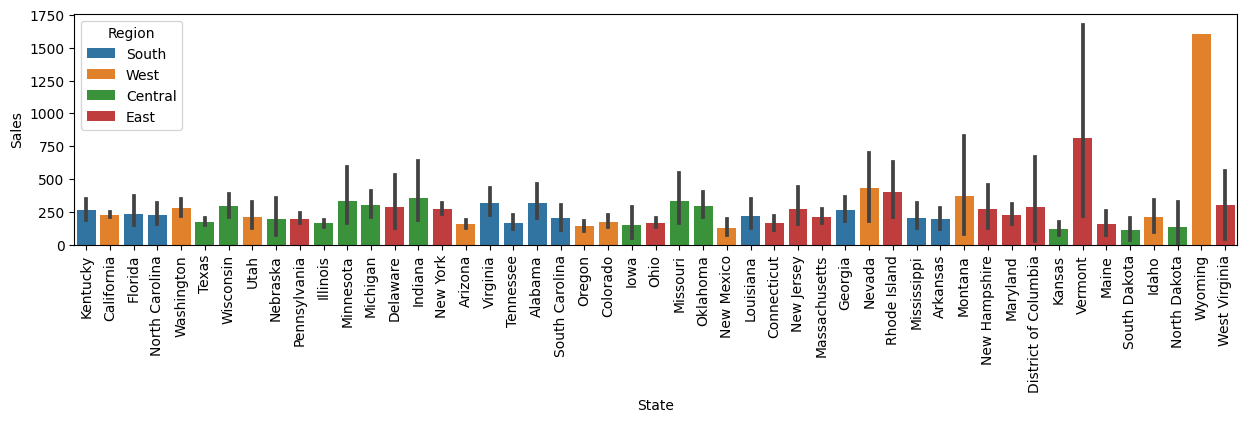

In [31]:
plt.subplots(figsize=(15,3))
sns.barplot(x="State" , y='Sales' , data=data ,hue=data['Region'] , dodge=False)
plt.xticks(rotation=90)
plt.show()

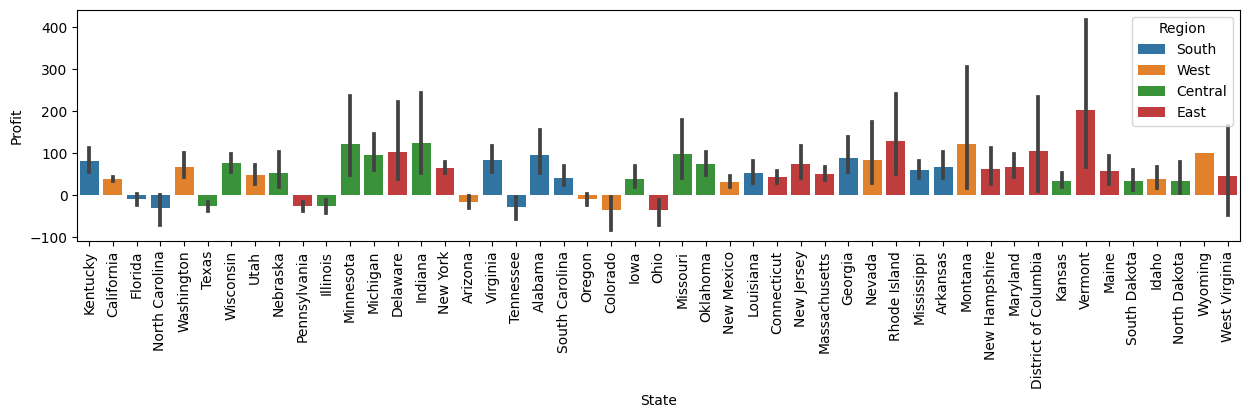

In [32]:
plt.subplots(figsize=(15,3))
sns.barplot(x="State" , y='Profit' , data=data ,hue=data['Region'] , dodge=False)
plt.xticks(rotation=90)
plt.show()

In [49]:
data.groupby("State")[['Sales']].sum().sort_values('Sales', ascending=False)[:10]

,Sales
State,
California,457576.2715
New York,310827.1510
Texas,170124.5418
Washington,138560.8100
Pennsylvania,116496.3620
Florida,89473.7080
Illinois,80162.5370
Ohio,77976.7640
Michigan,75879.6440


In [50]:
data.groupby("State")[['Profit']].mean().sort_values('Profit', ascending=False)[:10]

,Profit
State,
Vermont,204.088936
Rhode Island,130.100523
Indiana,123.375411
Montana,122.221900
Minnesota,121.608847
District of Columbia,105.958930
Delaware,103.930988
Wyoming,100.196000
Missouri,97.518341


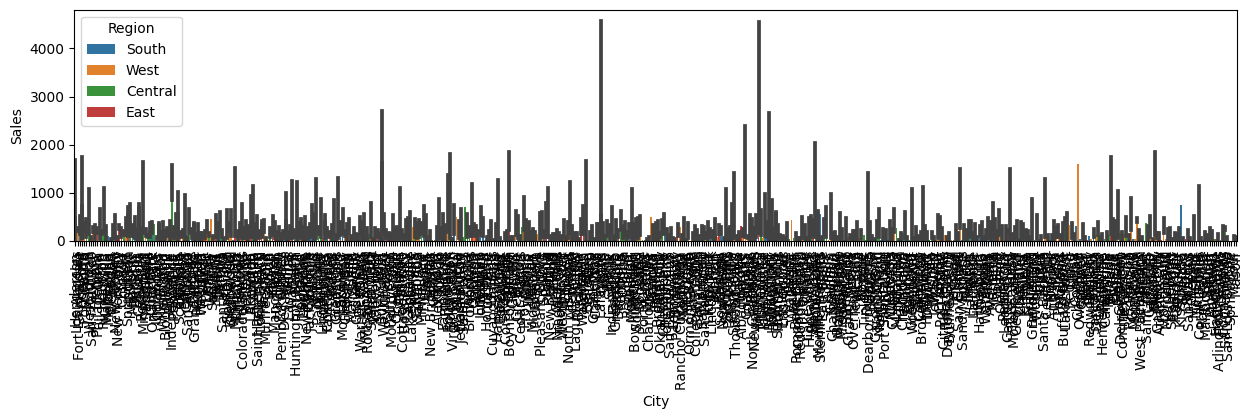

In [33]:
plt.subplots(figsize=(15,3))
sns.barplot(x="City" , y='Sales' , data=data ,hue=data['Region'] , dodge=False)
plt.xticks(rotation=90)
plt.show()

In [44]:
data.groupby("City")[['Profit']].sum().sort_values('Profit', ascending=False)[:10]

,Profit
City,
New York City,62013.8973
Los Angeles,30431.4267
Seattle,29121.6825
San Francisco,17466.1186
Detroit,13146.6935
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


In [46]:
data.groupby("City")[['Profit']].mean().sort_values('Profit', ascending=False)[:10]

,Profit
City,
Jamestown,642.885750
Independence,487.831500
Lafayette,323.173794
Minneapolis,296.721070
Appleton,277.383150
Morristown,262.603871
Burbank,254.844600
Lehi,225.831300
Beverly,218.306467


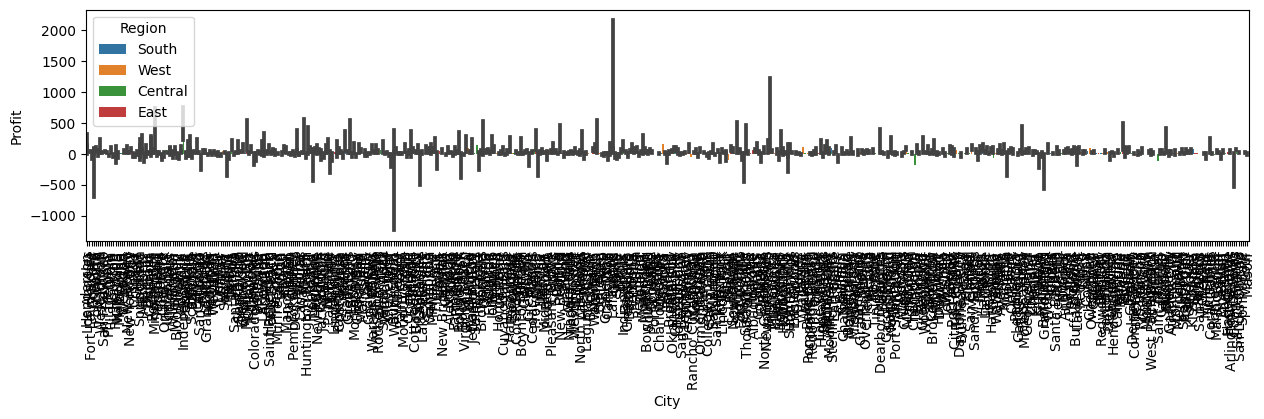

In [43]:
plt.subplots(figsize=(15,3))
sns.barplot(x="City" , y='Profit' , data=data ,hue=data['Region'] , dodge=False)
plt.xticks(rotation=90)
plt.show()

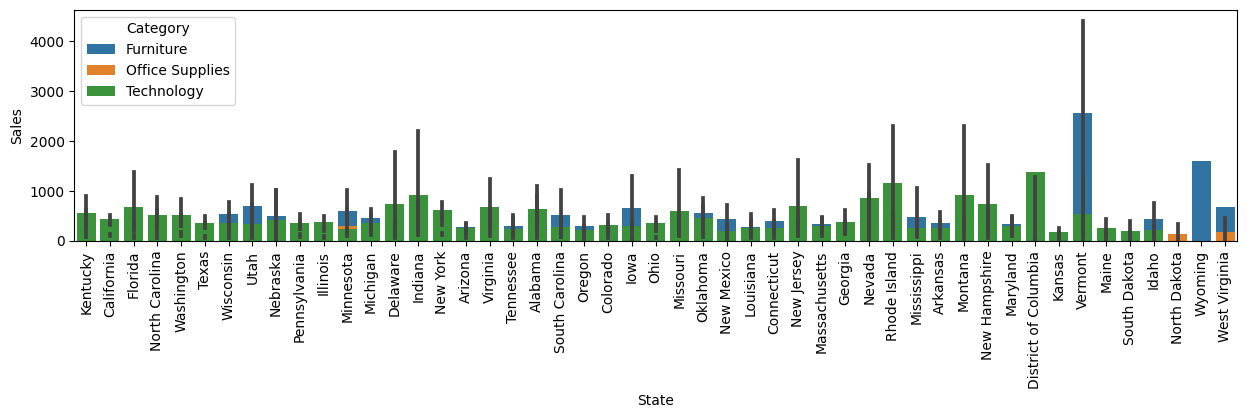

In [56]:
plt.subplots(figsize=(15,3))
sns.barplot(x="State" , y='Sales' , data=data ,hue=data['Category'] , dodge=False)
plt.xticks(rotation=90)
plt.show()

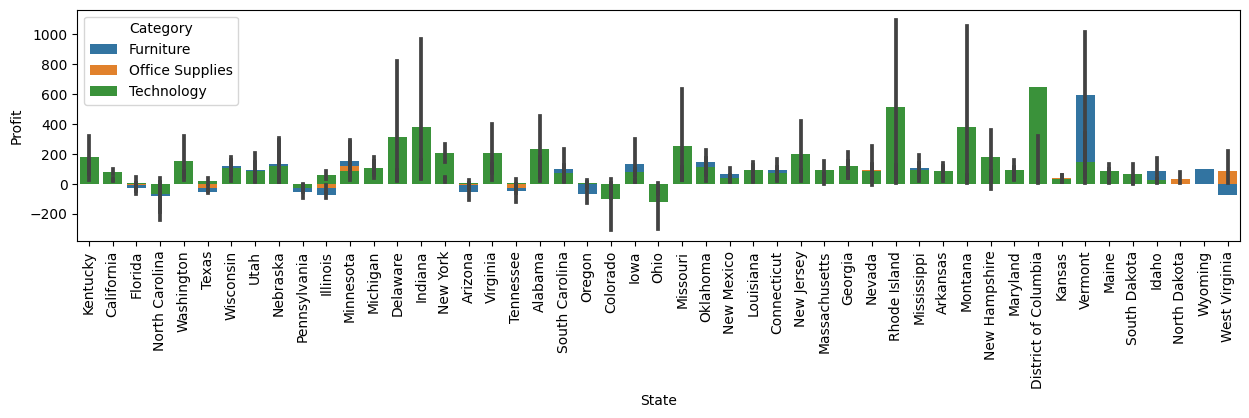

In [58]:
plt.subplots(figsize=(15,3))
sns.barplot(x="State" , y='Profit' , data=data ,hue=data['Category'] , dodge=False)
plt.xticks(rotation=90)
plt.show()

In [70]:
data['Unit Price'] = data.Sales / data.Quantity

data['Unit Profit'] = data.Profit / data.Quantity 

data_discounted = data[data['Discount'] > 0]

data_no_discount = data[data['Discount'] == 0]

print ("On Average :")

print("Discounted Sales per transaction is USD$", round(data_discounted['Sales'].mean(), 2), 
      ", without is USD$", round(data_no_discount['Sales'].mean(), 2))

print("Discounted Unit Price is USD$", round(data_discounted['Unit Price'].mean(), 2), 
      ", without is USD$", round(data_no_discount['Unit Price'].mean(), 2))

print("Discounted Quantity purchased per transaction is ", round(data_discounted['Quantity'].mean(), 2), 
      ", without is ", round(data_no_discount['Quantity'].mean(), 2))

print("Discounted Profit per transaction is USD$", round(data_discounted['Profit'].mean(), 2), 
      ", without is USD$", round(data_no_discount['Profit'].mean(), 2))

print("Discounted Unit Profit is USD$", round(data_discounted['Unit Profit'].mean(), 2), 
      ", without is USD$", round(data_no_discount['Unit Profit'].mean(), 2))

print(" ")

print ("In Total :")

print("Discounted Total Sales is USD$", round(data_discounted['Sales'].sum(), 2), 
      ", without is USD$", round(data_no_discount['Sales'].sum(), 2))

print("Discounted Total Quantity is ", round(data_discounted['Quantity'].sum(), 2), 
      ", without is ", round(data_no_discount['Quantity'].sum(), 2))

print("Discounted Total Profit is USD$", round(data_discounted['Profit'].sum(), 2), 
      ", without is USD$", round(data_no_discount['Profit'].sum(), 2))

On Average :
Discounted Sales per transaction is USD$ 232.93 , without is USD$ 227.13
Discounted Unit Price is USD$ 62.82 , without is USD$ 59.0
Discounted Quantity purchased per transaction is  3.77 , without is  3.81
Discounted Profit per transaction is USD$ -6.67 , without is USD$ 67.02
Discounted Unit Profit is USD$ -1.23 , without is USD$ 17.61
 
In Total :
Discounted Total Sales is USD$ 1208918.03 , without is USD$ 1087277.56
Discounted Total Quantity is  19590 , without is  18230
Discounted Total Profit is USD$ -34602.98 , without is USD$ 320844.41


Considering both average and total sales, customers tend to spend more when there are discounts. An average sales transaction with discounted products is USD $233 as compared to a lower USD $227 where there are no discounts. In total, the difference amounts to a notable USD $200k increase in sales value when there are discounts.

The average price of a discounted product is USD $63 as compared to USD $59 for a non-discounted product. This is indicative that discounts are offered on more expensive products to promote affordability.

Considering both average and total sales quantities, customers tend to buy more products when there are discounts. Although the average quantity in a sales transaction that includes discounted products is 3.77 as compared to a higher 3.81 where there are no discounts, the total difference amounts to a notable 1.3k of additional products sold when there are discounts.
